<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Supervised Machine Learning - Linear Regression - Week 1</center></h1>


<center><img src="https://images.moneycontrol.com/static-mcnews/2021/04/Aviation-featured.jpg?impolicy=website&width=1600&height=900"

<b><h2><center>Airlines in India Flight Fare Case Study</center></h2></b>

## LIBRARY and DATA IMPORT

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
#

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
path='/content/drive/MyDrive/Python Course'

In [26]:
df=pd.read_csv(f"{path}/Clean_Dataset.csv")

## EDA

In [27]:
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [28]:
df.shape

(300153, 12)

In [29]:
df=df.drop(["Unnamed: 0"],axis=1)

In [30]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
df.tail(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [32]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [33]:
df.duplicated().sum()

0

In [34]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [35]:
df['flight'].nunique()

1561

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [37]:
df["days_left"].value_counts()

,count
days_left,
25,6633
18,6602
39,6593
32,6585
26,6573
24,6542
19,6537
31,6534
33,6532


In [38]:
df["duration"].value_counts()

,count
duration,
2.17,4242
2.25,4036
2.75,2879
2.08,2755
2.83,2323
...,...
37.17,1
38.75,1
38.50,1


In [39]:
# separate the two sets
cat_cols = ['airline','source_city','destination_city','stops','arrival_time', 'class']
num_cols = ['duration','days_left','price']

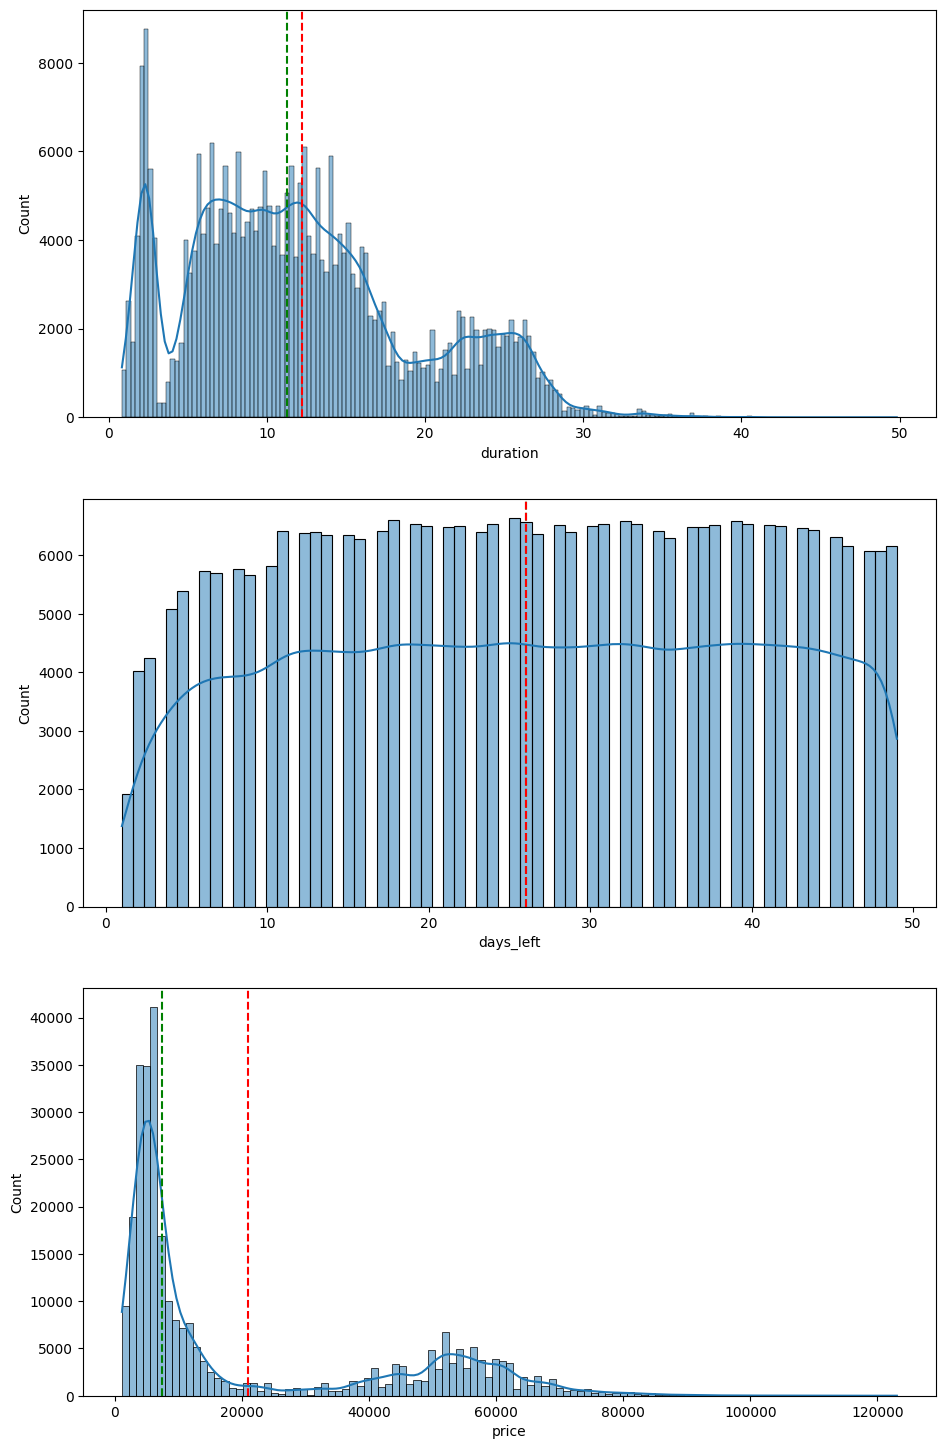

In [40]:
# plot histplots for numerical variables
fig, ax = plt.subplots(3,1,figsize=(11,18));
ax=ax.flatten();
j=0

for i in num_cols:
    sns.histplot(df[i],ax=ax[j], kde="True");
    ax[j].axvline(df[i].median(),ls='--',c="g");
    ax[j].axvline(df[i].mean(),ls='--',c="r");
    j+=1

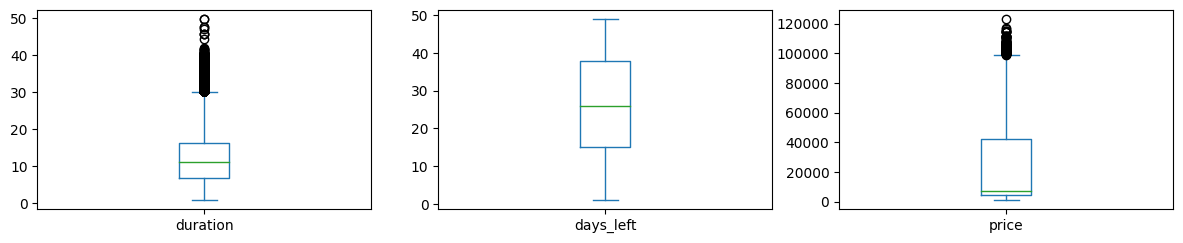

In [41]:
df.plot(kind ="box",subplots=True,figsize=(25,15),layout=(5,5));

In [42]:
df["airline"].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


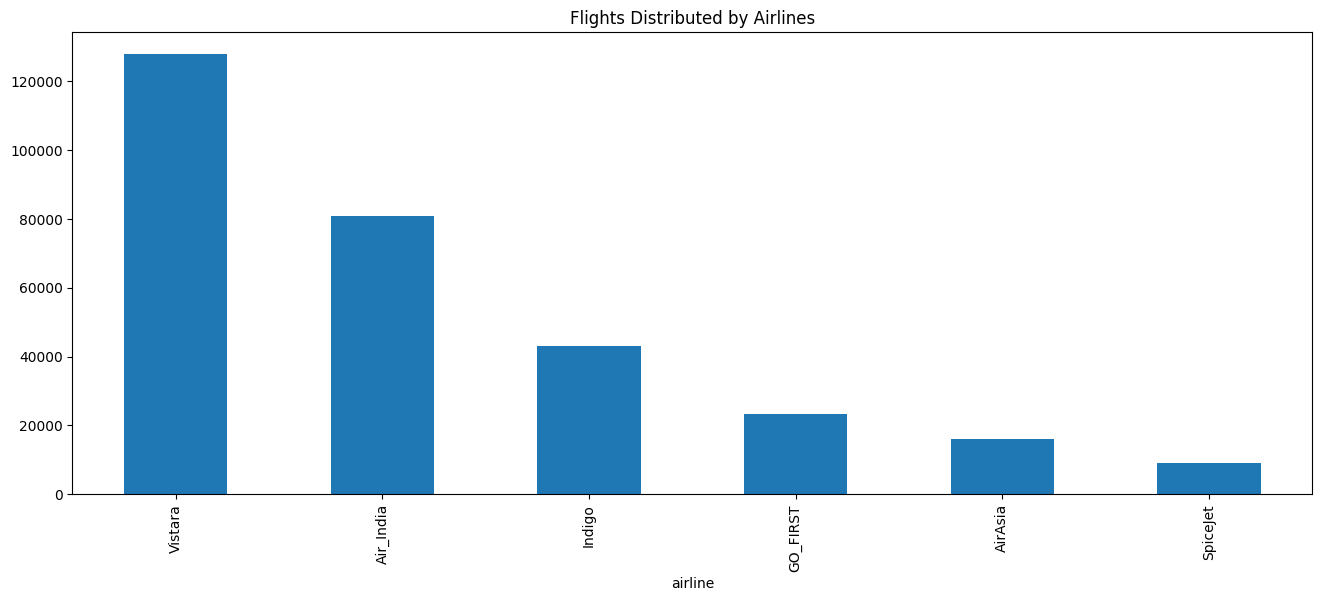

In [43]:
plt.figure(figsize=(16,6))
plt.title("Flights Distributed by Airlines")
df["airline"].value_counts().plot(kind ="bar");

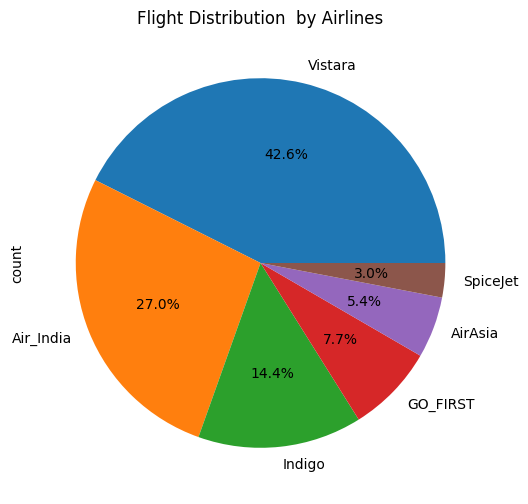

In [44]:
plt.figure(figsize=(16,6))
plt.title("Flight Distribution  by Airlines")
df["airline"].value_counts().plot(kind ="pie",autopct='%1.1f%%');

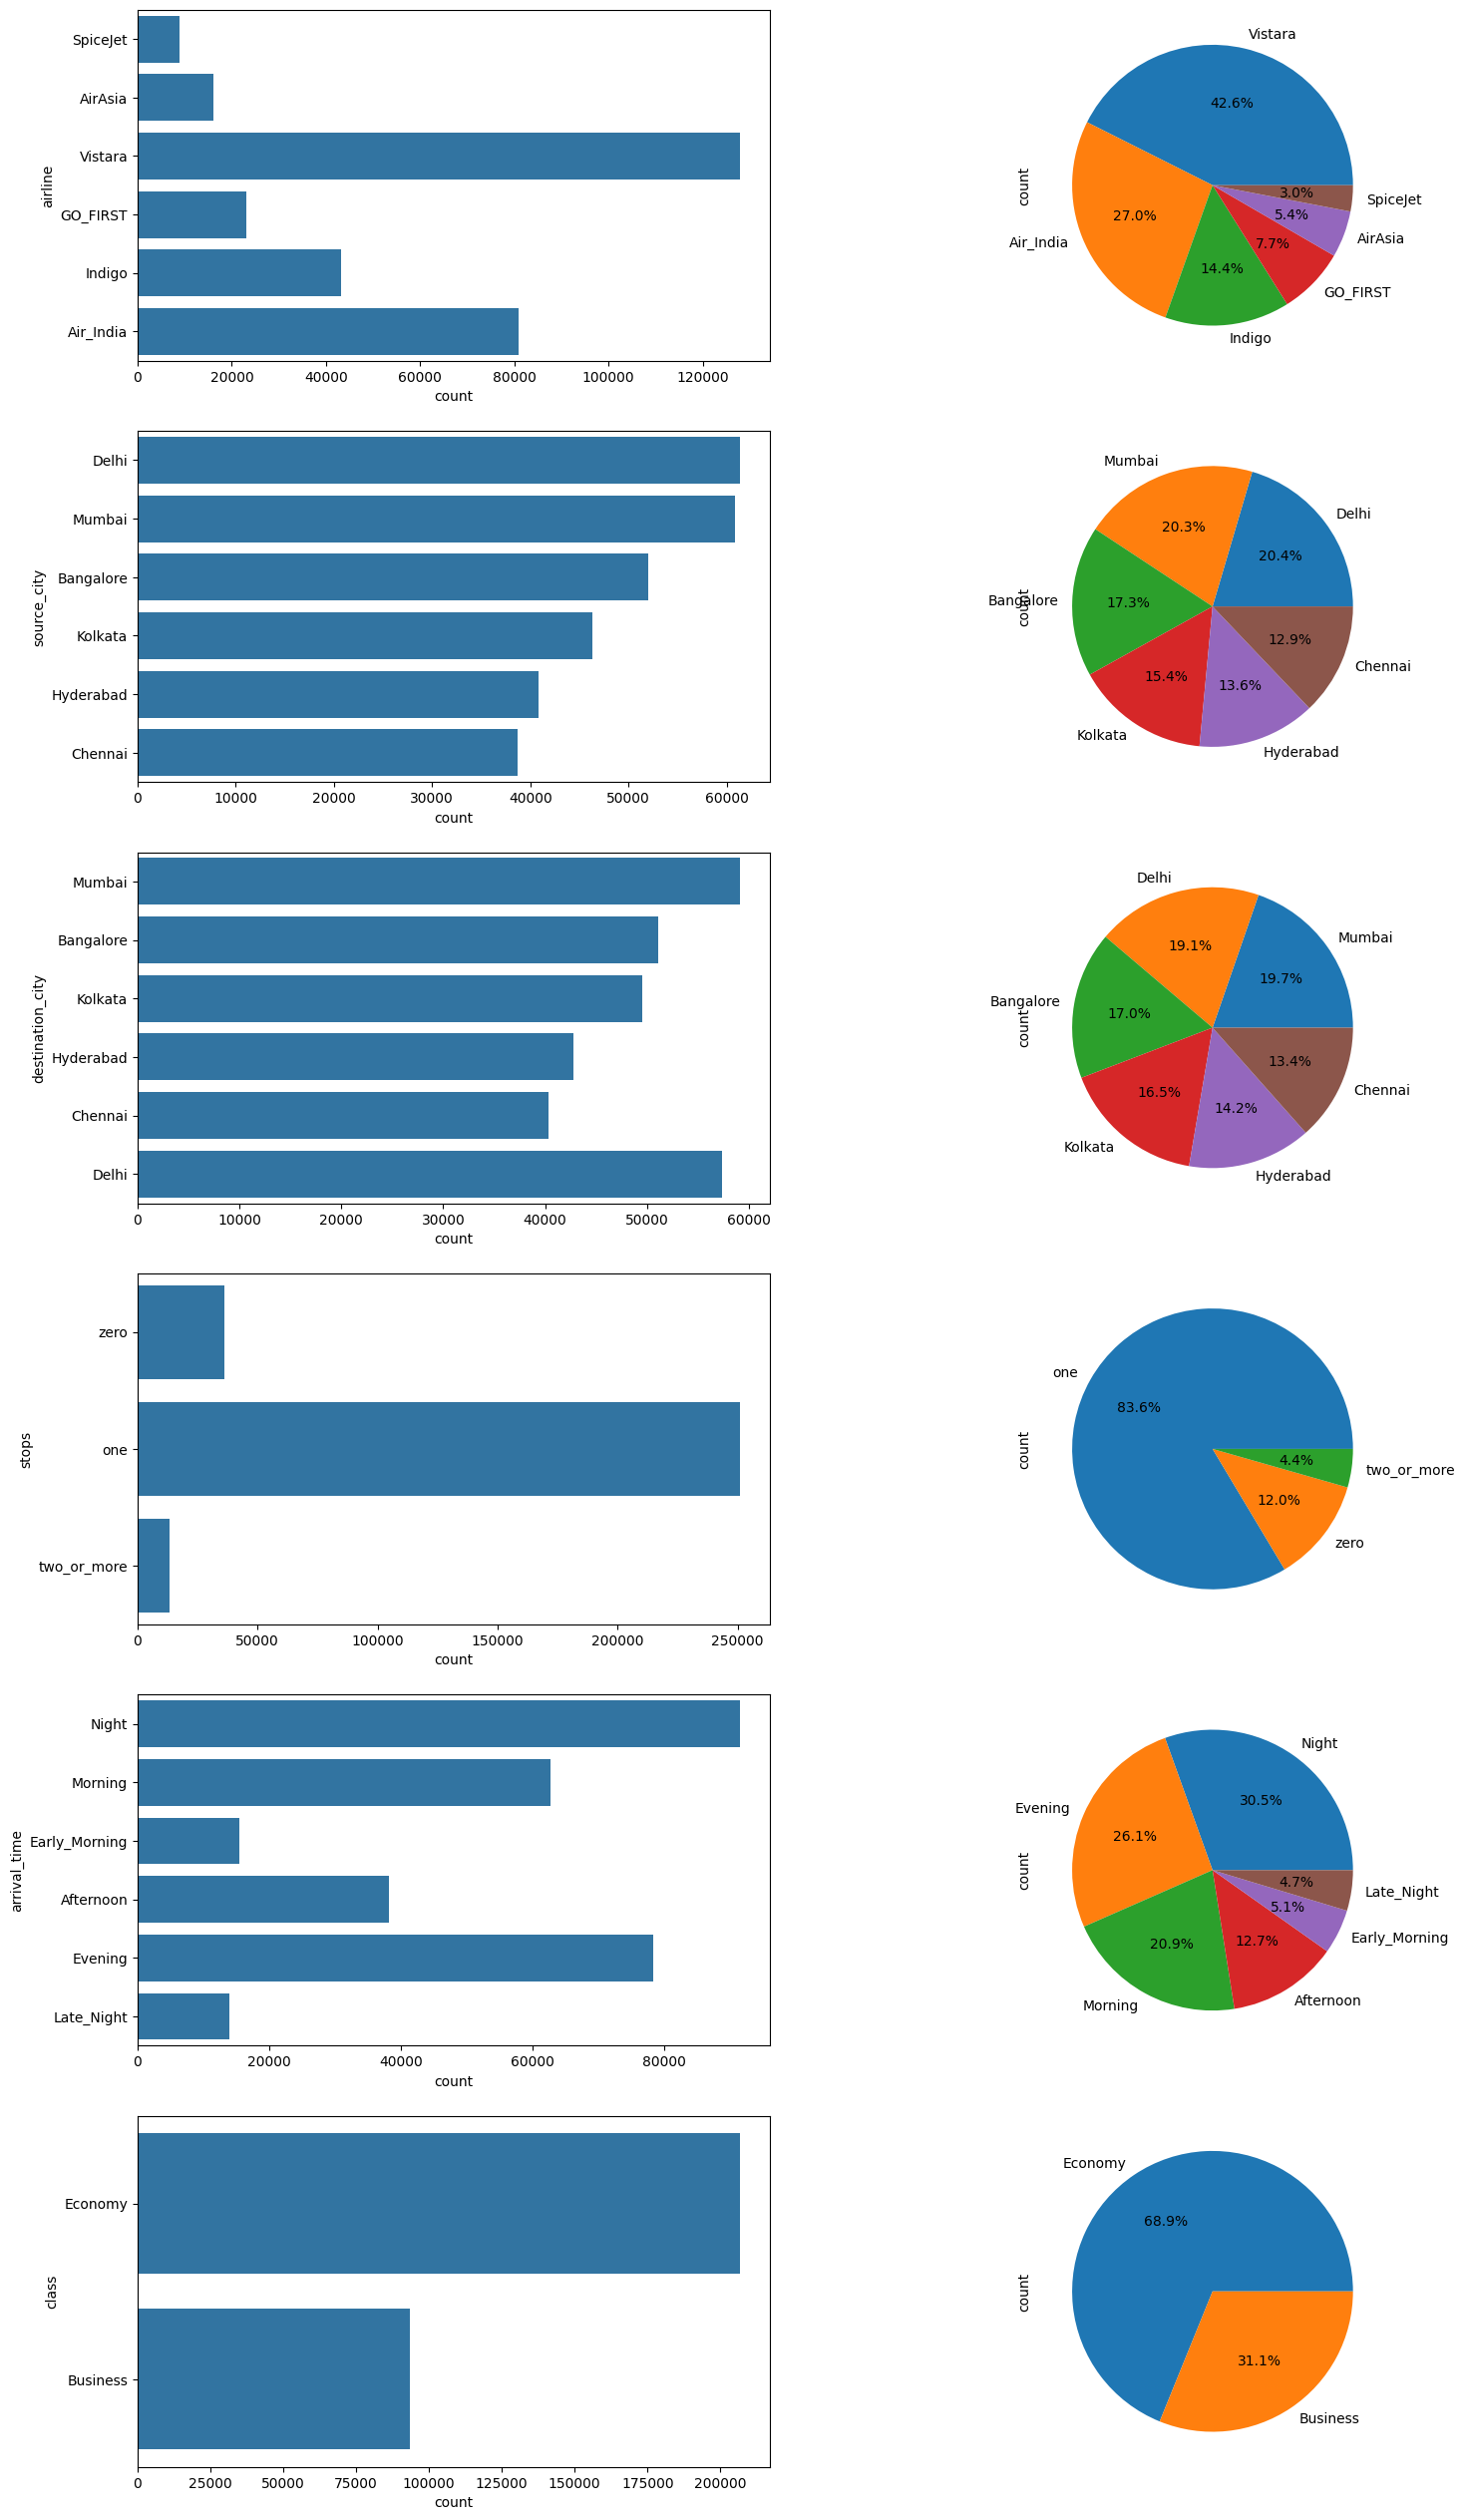

In [45]:
# plot countplots for categorical variables
fig, ax = plt.subplots(6,2,figsize=(18,32));
ax=ax.flatten();
j=0

for i in cat_cols:
    sns.countplot(df[i],ax=ax[j]);
    df[i].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[j+1]);
    j+=2

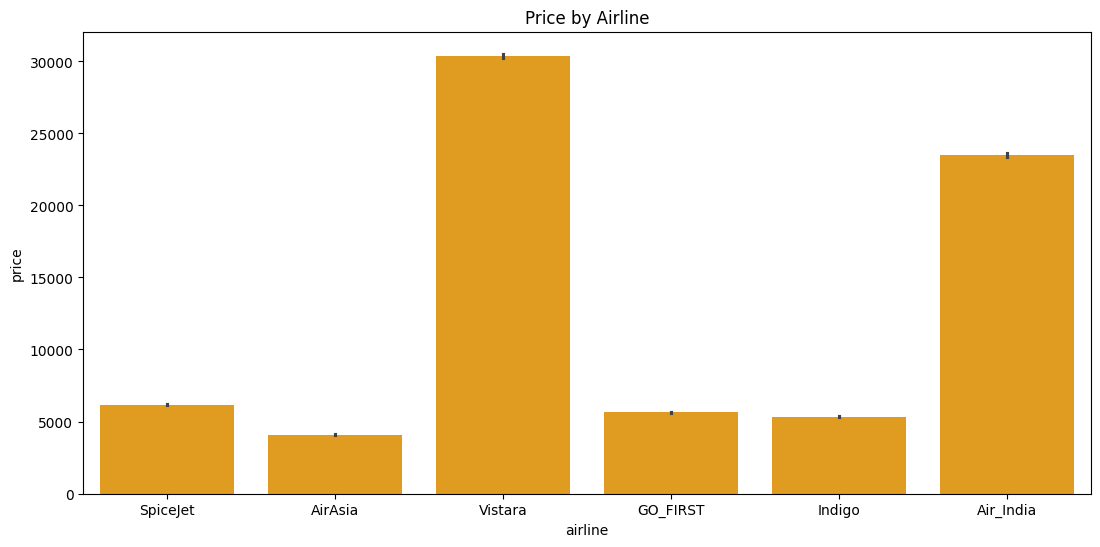

In [46]:
plt.figure(figsize=(13,6))
plt.title("Price by Airline")
sns.barplot(x="airline", y="price",color="Orange",data=df);
plt.show()

In [47]:
top=df["airline"].value_counts()

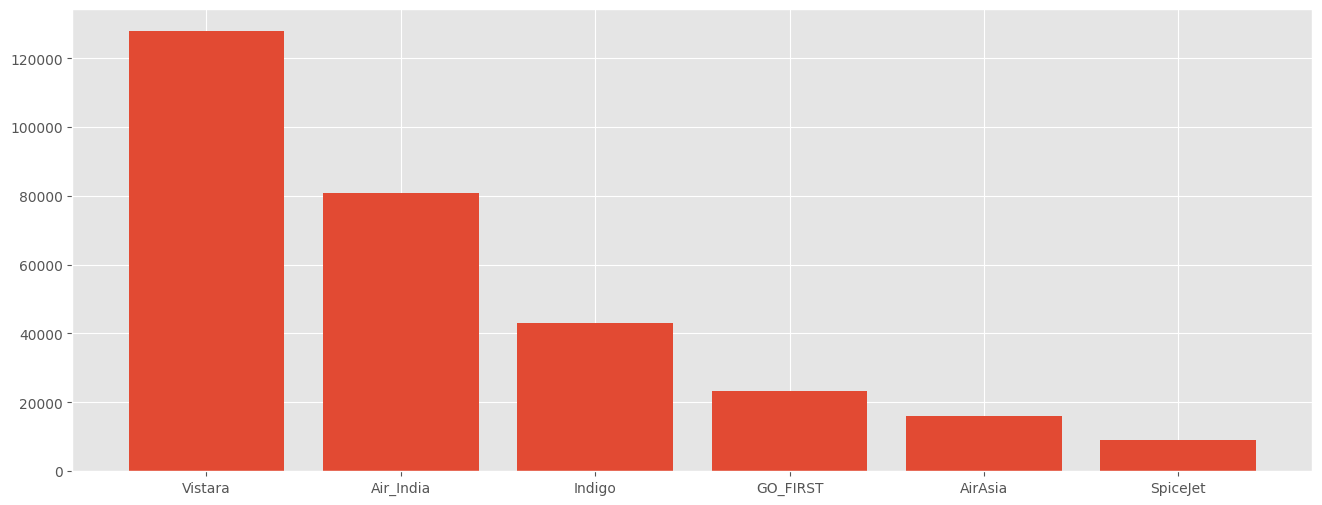

In [48]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(top.index,top.values)
plt.show()

In [49]:
numeric_df = df.select_dtypes(include=['number'])

In [50]:
df.tail(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [51]:
a=list()
for i in range(300153):
    a.append(df["airline"][i])

In [52]:
hedef1={"hedef1":a}

In [53]:
hedef1=pd.DataFrame(hedef1)

In [54]:
hedef1

,hedef1
0,SpiceJet
1,SpiceJet
2,AirAsia
3,Vistara
4,Vistara
...,...
300148,Vistara
300149,Vistara
300150,Vistara
300151,Vistara


In [55]:
numeric_df["airline"]=hedef1

In [56]:
numeric_df

,duration,days_left,price,airline
0,2.17,1,5953,SpiceJet
1,2.33,1,5953,SpiceJet
2,2.17,1,5956,AirAsia
3,2.25,1,5955,Vistara
4,2.33,1,5955,Vistara
...,...,...,...,...
300148,10.08,49,69265,Vistara
300149,10.42,49,77105,Vistara
300150,13.83,49,79099,Vistara
300151,10.00,49,81585,Vistara


In [57]:
air_mean=numeric_df.groupby(by="airline").mean()

In [58]:
air_mean

,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


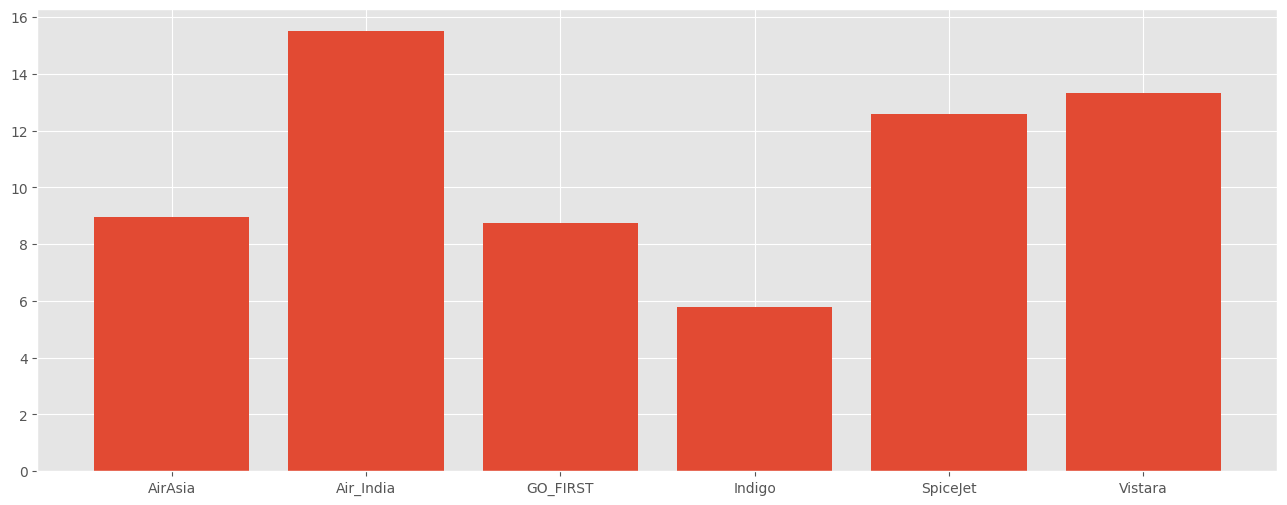

In [59]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(air_mean.index,air_mean["duration"])
plt.show()

In [60]:
city=df["source_city"].value_counts()

In [61]:
city

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


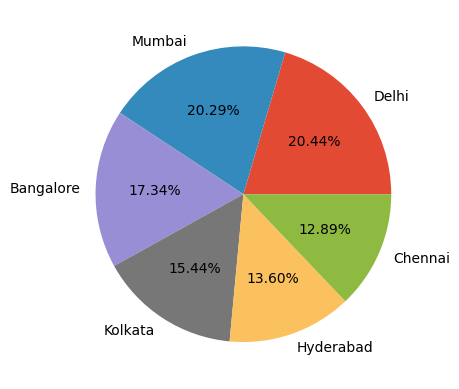

In [62]:
plt.pie(city.values,labels=city.index,autopct="%1.2f%%")
plt.show()

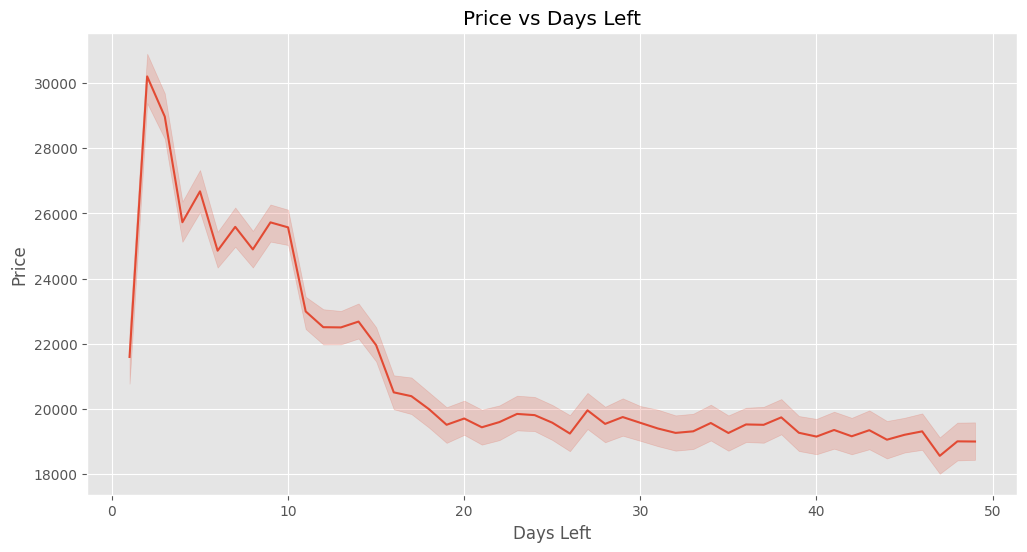

In [63]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=df)
plt.title('Price vs Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

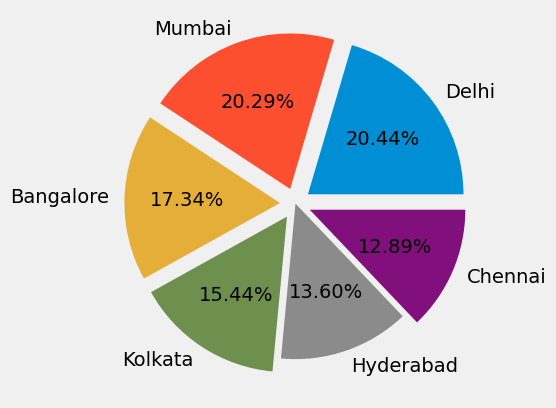

In [64]:
plt.style.use("fivethirtyeight")
plt.pie(city.values,labels=city.index,autopct="%1.2f%%",explode=[0.1,0.1,0.1,0.1,0,0.1])
plt.show()

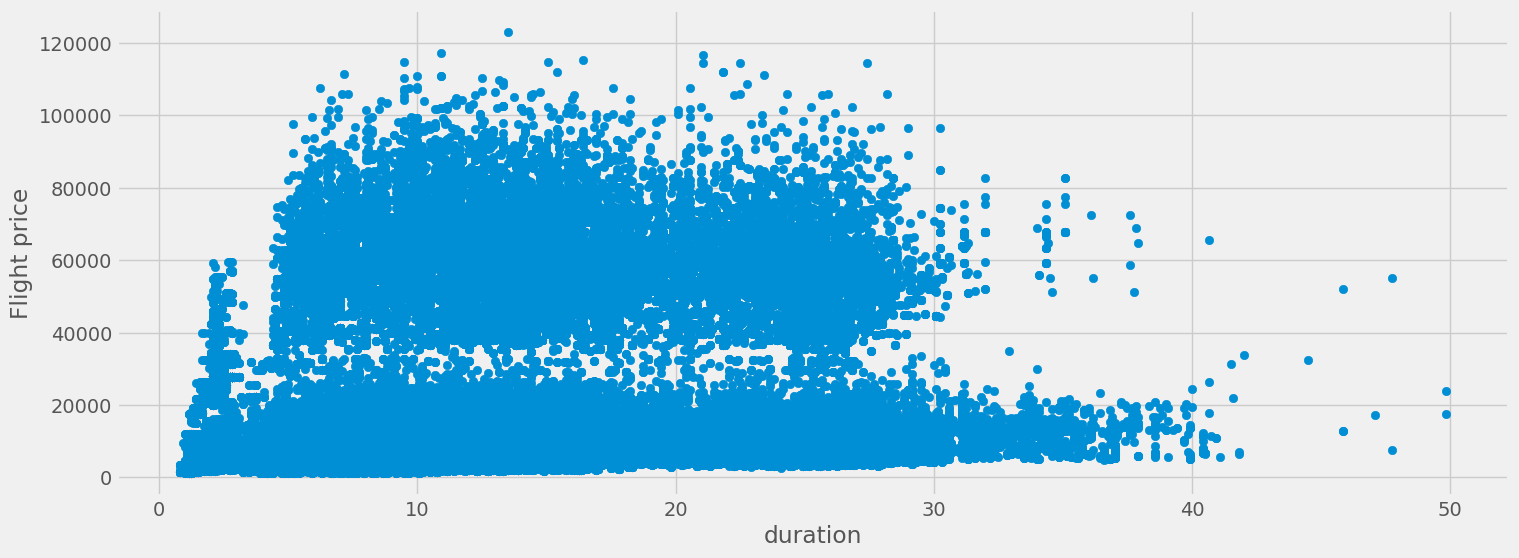

In [65]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,6))
plt.scatter(df["duration"],df["price"])
plt.xlabel("duration")
plt.ylabel("Flight price")
plt.show()

In [66]:
df=df.drop(["flight"],axis=1)

In [67]:
df["duration"]=df["duration"].astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int64 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 22.9+ MB


In [69]:
df=pd.get_dummies(df,columns=["airline","source_city","departure_time","stops","arrival_time","destination_city","class"],drop_first=True)

In [70]:
df.corr()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
duration,1.000000,-0.039206,0.205079,0.276124,-0.139994,-0.365838,0.008352,0.134154,0.032869,-0.048764,...,0.033605,-0.107231,0.121964,-0.064201,0.060798,-0.114467,0.066452,0.061827,-0.044618,-0.139375
days_left,-0.039206,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,...,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.013039
price,0.205079,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,...,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.937860
airline_Air_India,0.276124,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,...,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490,-0.124899
airline_GO_FIRST,-0.139994,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,...,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.194540
airline_Indigo,-0.365838,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,...,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242,0.275477
airline_SpiceJet,0.008352,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,...,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.118325
airline_Vistara,0.134154,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,...,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.302116
source_city_Chennai,0.032869,0.002581,0.018742,-0.011600,-0.063273,0.033626,0.003331,0.031174,1.000000,-0.194991,...,0.016559,0.009136,-0.024027,0.004418,-0.151660,0.060364,0.016905,0.015972,0.042960,-0.010204
source_city_Delhi,-0.048764,-0.001292,-0.043282,0.009886,0.030585,-0.012615,0.033040,-0.046163,-0.194991,1.000000,...,-0.025908,-0.028147,0.003773,-0.007427,0.061265,-0.246344,0.014093,0.040300,0.066721,0.014098


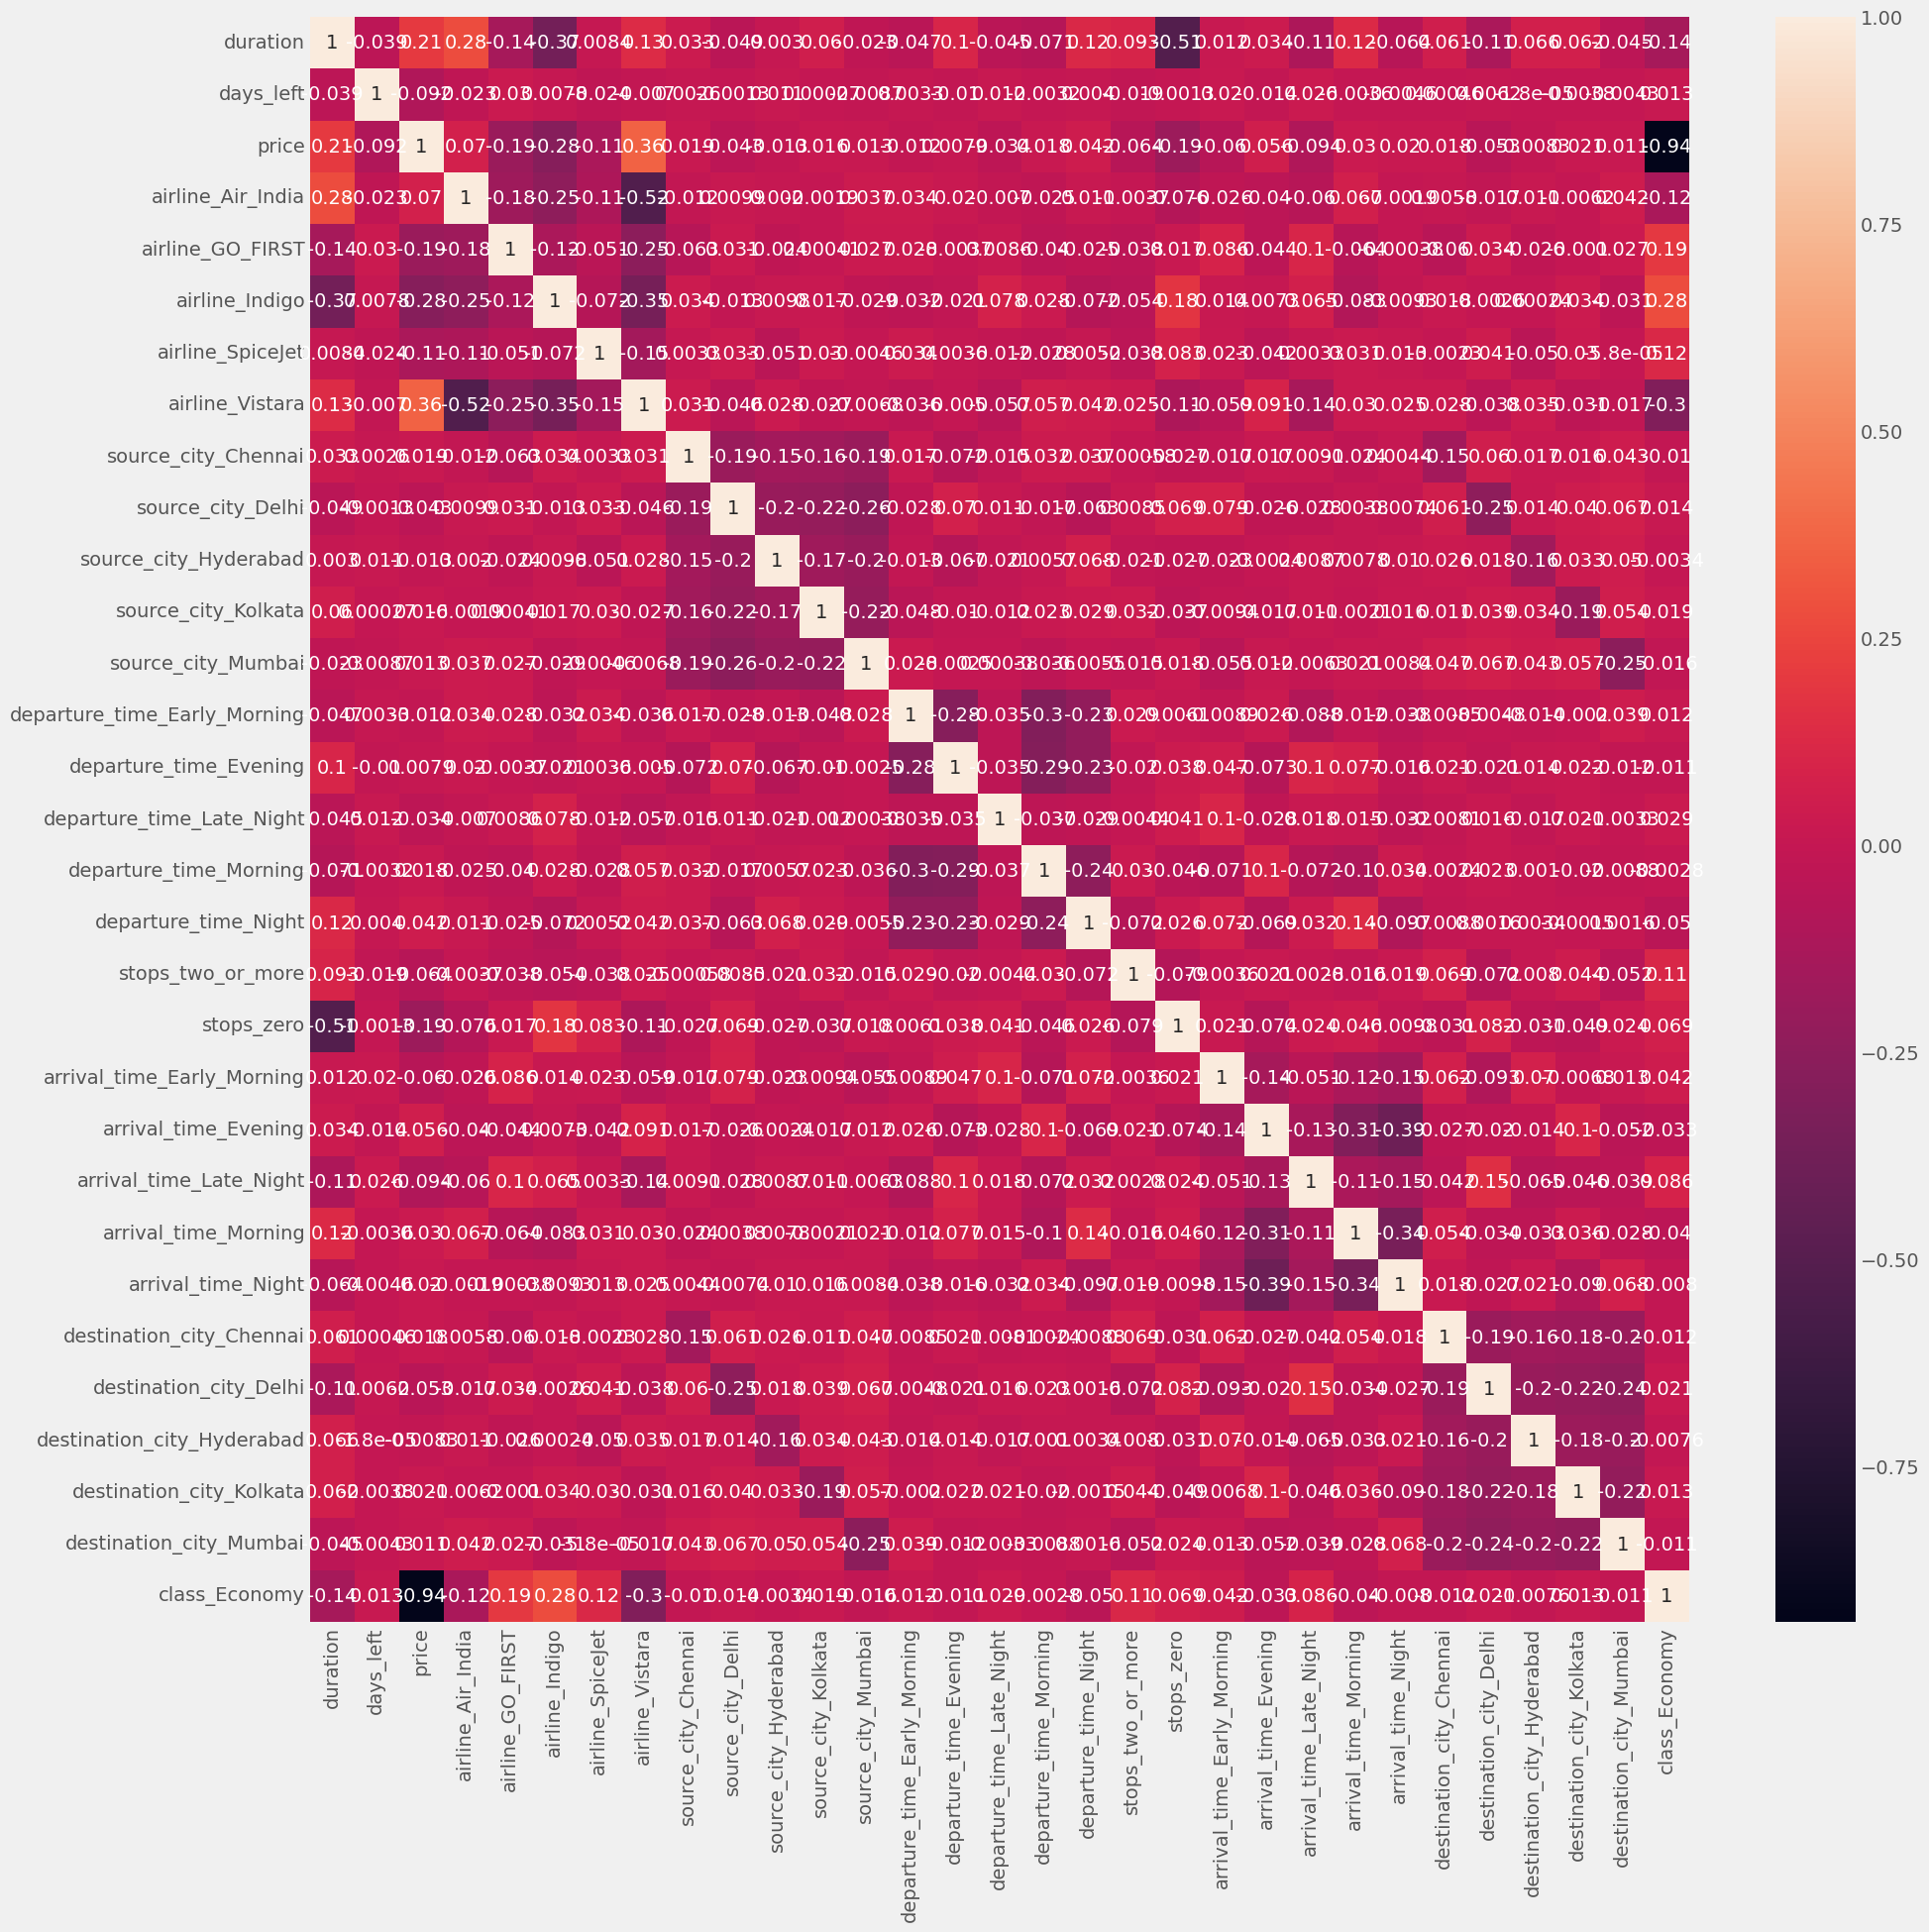

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   duration                      300153 non-null  int64
 1   days_left                     300153 non-null  int64
 2   price                         300153 non-null  int64
 3   airline_Air_India             300153 non-null  bool 
 4   airline_GO_FIRST              300153 non-null  bool 
 5   airline_Indigo                300153 non-null  bool 
 6   airline_SpiceJet              300153 non-null  bool 
 7   airline_Vistara               300153 non-null  bool 
 8   source_city_Chennai           300153 non-null  bool 
 9   source_city_Delhi             300153 non-null  bool 
 10  source_city_Hyderabad         300153 non-null  bool 
 11  source_city_Kolkata           300153 non-null  bool 
 12  source_city_Mumbai            300153 non-null  bool 
 13  departure_time

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [75]:
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,0.040816,0.0,0.039749,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,0.040816,0.0,0.039749,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,True,True
2,0.040816,0.0,0.039773,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
3,0.040816,0.0,0.039765,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,True
4,0.040816,0.0,0.039765,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,True


In [76]:
x=df.drop("price",axis=1)
y=df["price"]

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23,train_size=0.85)

In [78]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [79]:
model.score(x_test,y_test)

0.9108310216586716

In [80]:
regr_ridge=Ridge()
model1=regr_ridge.fit(x_train,y_train)

In [81]:
model1.score(x_test,y_test)

0.910831160566863

In [82]:
regr_lasso=Lasso()
model2=regr_lasso.fit(x_train,y_train)

In [83]:
model2.score(x_test,y_test)

-0.00016942726733937263

In [84]:
x_test

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
18541,0.571429,0.854167,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
50676,0.122449,0.791667,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
88448,0.142857,0.458333,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
80088,0.122449,0.437500,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
193761,0.020408,1.000000,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90620,0.081633,0.666667,False,True,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
276568,0.040816,0.750000,False,False,False,False,True,False,False,True,...,False,False,False,True,False,True,False,False,False,False
206522,0.142857,0.979167,False,False,True,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,True
52419,0.040816,0.979167,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True


In [85]:
from sklearn import metrics

#make prediction
pred=model.predict(x_test)
print("\nMean Absolute Error:",metrics.mean_absolute_error(y_test,pred))
from sklearn.metrics import r2_score
print("\nR2_Score:",r2_score(y_test, pred))
#
# Adj. R2 Score
factor = (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
AdjR2=1-(1-r2_score(y_test,pred))*factor
print("\nAdjR2_Score:",AdjR2)


Mean Absolute Error: 0.037251275680586615

R2_Score: 0.9108310216586716

AdjR2_Score: 0.9107715651030563
